In [7]:
import random
import time
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


In [9]:
alpha = 0.9
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.9995
min_epsilon = 0.01

num_episodes = 5000
max_steps = 100

In [10]:
env = gym.make('Taxi-v3')
n_states = env.observation_space.n
n_actions = env.action_space.n

In [11]:

def choose_action(state, eps):
    if random.random() < eps:
        return env.action_space.sample()
    else:
        return int(np.argmax(Q[state, :]))

In [12]:
episode_rewards = []
eps = epsilon

for episode in range(num_episodes):
    state, _ = env.reset()
    state = int(state)
    episode_reward = 0.0

    for step in range(max_steps):
        action = choose_action(state, eps)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        next_state = int(next_state)

        old_value = Q[state, action]
        next_max = np.max(Q[next_state, :])
        Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

        state = next_state
        episode_reward += reward

        if done:
            break

    episode_rewards.append(episode_reward)
    eps = max(min_epsilon, eps * epsilon_decay)

env.close()

In [13]:
def moving_average(x, window):
    if len(x) < window:
        return np.array(x)
    return np.convolve(x, np.ones(window)/window, mode='valid')

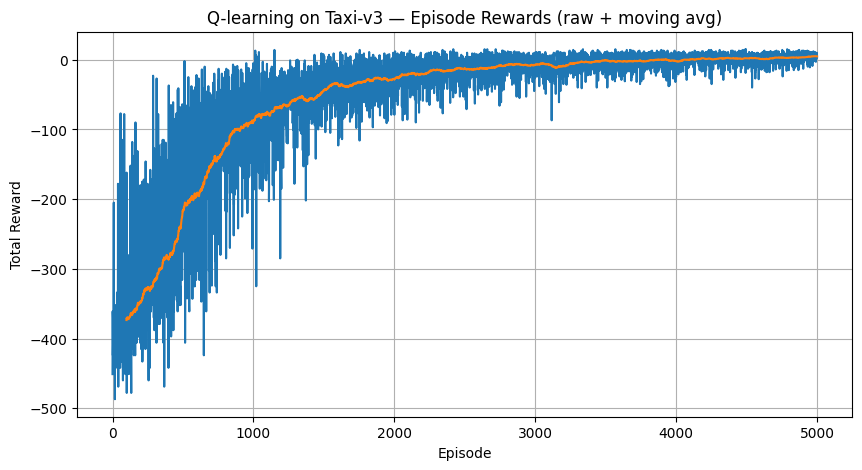

In [14]:
window = 100
smoothed = moving_average(episode_rewards, window)

plt.figure(figsize=(10,5))
plt.plot(episode_rewards)
plt.plot(range(window-1, window-1+len(smoothed)), smoothed)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-learning on Taxi-v3 — Episode Rewards (raw + moving avg)')
plt.grid(True)
plt.show()

In [15]:
eval_env = gym.make('Taxi-v3', render_mode='ansi')
eval_rewards = []
num_eval = 10

In [16]:
for ep in range(num_eval):
    state, _ = eval_env.reset()
    state = int(state)
    total = 0
    done = False
    for step in range(max_steps):
        action = int(np.argmax(Q[state, :]))
        next_state, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        state = int(next_state)
        total += reward
        if done:
            break
    eval_rewards.append(total)
    print(f"Eval episode {ep}: total reward = {total}")

print(f"Average eval reward over {num_eval} episodes: {np.mean(eval_rewards):.2f}")
eval_env.close()


Eval episode 0: total reward = 8
Eval episode 1: total reward = 13
Eval episode 2: total reward = 12
Eval episode 3: total reward = 9
Eval episode 4: total reward = 7
Eval episode 5: total reward = 7
Eval episode 6: total reward = 9
Eval episode 7: total reward = 6
Eval episode 8: total reward = 6
Eval episode 9: total reward = 9
Average eval reward over 10 episodes: 8.60
